In [58]:
# !pip install fbprophet
from fbprophet import Prophet
import matplotlib.pyplot as plt

In [59]:
import pandas as pd
df1 = pd.read_csv('/content/daily-minimum-temperatures.csv')

In [60]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3650 entries, 0 to 3649
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    3650 non-null   object 
 1   Temp    3650 non-null   float64
dtypes: float64(1), object(1)
memory usage: 57.2+ KB


In [61]:
df1.Date = pd.to_datetime(df1.Date)
df1.tail()

,Date,Temp
3645,1990-12-27,14.0
3646,1990-12-28,13.6
3647,1990-12-29,13.5
3648,1990-12-30,15.7
3649,1990-12-31,13.0


In [62]:
df1.columns=['ds', 'y']
df1.tail()

,ds,y
3645,1990-12-27,14.0
3646,1990-12-28,13.6
3647,1990-12-29,13.5
3648,1990-12-30,15.7
3649,1990-12-31,13.0


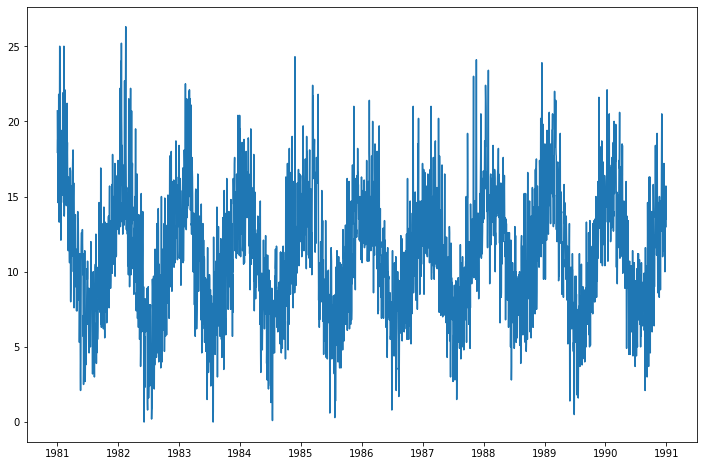

In [63]:
plt.figure(figsize=(12,8))
plt.plot(df1.set_index(['ds']))

In [64]:
model = Prophet()

In [65]:
model.fit(df1)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [66]:
model.component_modes

{'additive': ['yearly',
  'weekly',
  'additive_terms',
  'extra_regressors_additive',
  'holidays'],
 'multiplicative': ['multiplicative_terms', 'extra_regressors_multiplicative']}

In [67]:
future = model.make_future_dataframe(periods=365)
forecast = model.predict(future)

In [68]:
future.tail()

,ds
4010,1991-12-27
4011,1991-12-28
4012,1991-12-29
4013,1991-12-30
4014,1991-12-31


In [69]:
forecast.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4015 entries, 0 to 4014
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   ds                          4015 non-null   datetime64[ns]
 1   trend                       4015 non-null   float64       
 2   yhat_lower                  4015 non-null   float64       
 3   yhat_upper                  4015 non-null   float64       
 4   trend_lower                 4015 non-null   float64       
 5   trend_upper                 4015 non-null   float64       
 6   additive_terms              4015 non-null   float64       
 7   additive_terms_lower        4015 non-null   float64       
 8   additive_terms_upper        4015 non-null   float64       
 9   weekly                      4015 non-null   float64       
 10  weekly_lower                4015 non-null   float64       
 11  weekly_upper                4015 non-null   float64     

In [70]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1981-01-01,11.857441,11.650664,18.473336,11.857441,11.857441,3.328264,3.328264,3.328264,0.010955,0.010955,0.010955,3.317309,3.317309,3.317309,0.0,0.0,0.0,15.185705
1,1981-01-02,11.855608,11.689199,19.048448,11.855608,11.855608,3.375073,3.375073,3.375073,-0.019841,-0.019841,-0.019841,3.394914,3.394914,3.394914,0.0,0.0,0.0,15.230680
2,1981-01-03,11.853774,11.922804,18.573938,11.853774,11.853774,3.411907,3.411907,3.411907,-0.060133,-0.060133,-0.060133,3.472040,3.472040,3.472040,0.0,0.0,0.0,15.265682
3,1981-01-04,11.851941,11.537932,19.021512,11.851941,11.851941,3.394356,3.394356,3.394356,-0.153086,-0.153086,-0.153086,3.547443,3.547443,3.547443,0.0,0.0,0.0,15.246298
4,1981-01-05,11.850108,11.991254,18.971993,11.850108,11.850108,3.600197,3.600197,3.600197,-0.019703,-0.019703,-0.019703,3.619899,3.619899,3.619899,0.0,0.0,0.0,15.450305


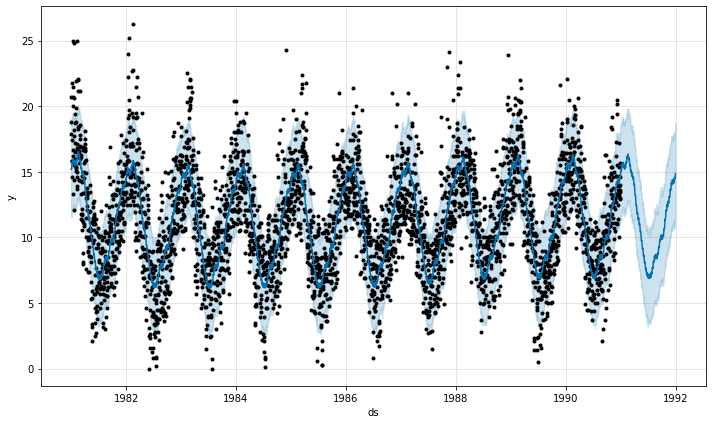

In [71]:
fig = model.plot(forecast)

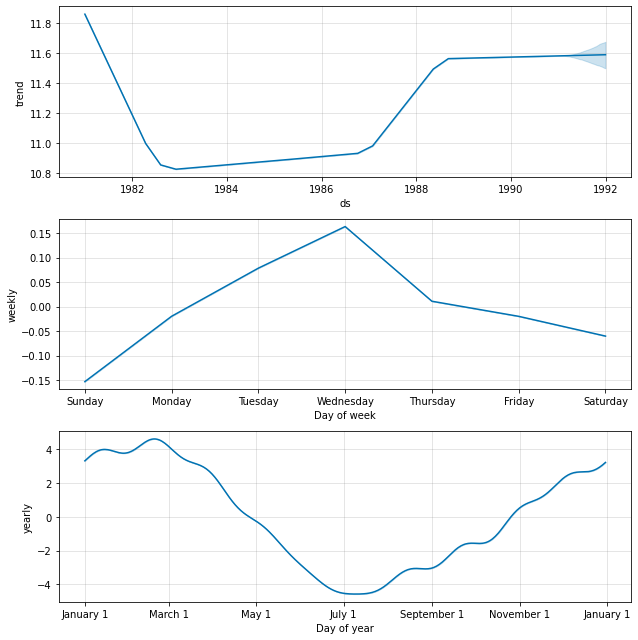

In [72]:
fig = model.plot_components(forecast)